In [1]:
%load_ext cython


In [2]:
%%cython 
import numpy as np
cimport numpy as np
import random
cimport cython

@cython.boundscheck(False)
@cython.cdivision(True)
def matriz(int N):
    cdef np.ndarray[np.uint16_t,ndim=2] M = np.zeros((2*N+1,2*N+1), \
        dtype=np.uint16)
    M[N,N]=2
    return M



@cython.boundscheck(False)
@cython.cdivision(True)
def siguiente(np.ndarray[np.uint16_t,ndim=2] M, double p):
    cdef int n
    cdef int m
    cdef int N = M.shape[0]
    ##print N
    cdef np.uint16_t[:,:] MV = M
    for n in range(0,N-1):
        for m in range(0,N-1):
            if MV[n,m]==2:
                if MV[n-1,m] == 0:
                    x = np.random.uniform(0.0,1.0)
                    if x < p:
                        M[n-1,m] = 2
                if MV[n,m-1] == 0:
                    x = np.random.uniform(0.0,1.0)
                    if x < p:
                        M[n,m-1] = 2
                if MV[n+1,m] == 0:
                    x = np.random.uniform(0.0,1.0)
                    if x < p:
                        M[n+1,m] = 2
                if MV[n,m+1] == 0:
                    x = np.random.uniform(0.0,1.0)
                    if x < p:
                        M[n,m+1] = 2
                MV[n,m] = 1
    return M



#M = matriz(5)
#M1 = siguiente(M,0.9)
#M2 = siguiente(M1,0.9)
#print np.asarray(M1)
#print np.asarray(M2)



<IPython.core.display.Javascript object>


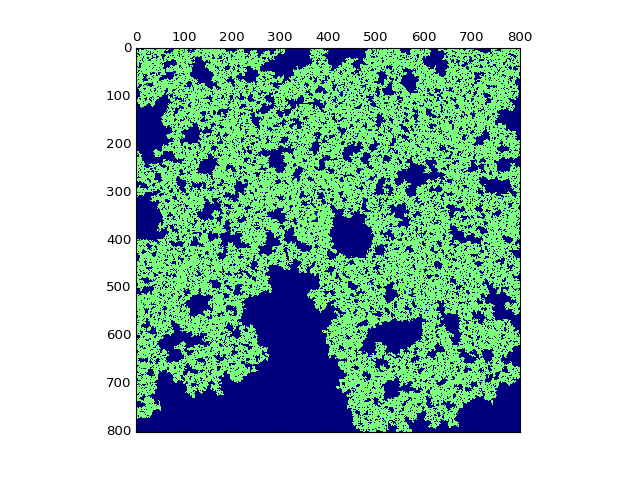

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#import random
import matplotlib.animation as animation


%matplotlib notebook


M = matriz(400)


def generate_data(M):
       return siguiente(M,0.501)

fig, ax = plt.subplots()
mat = ax.matshow(generate_data(M))

def update(data):
    mat.set_data(data)
    return mat 

def data_gen():
    global M
    M = generate_data(M)
    yield M
    


ani = animation.FuncAnimation(fig, update,data_gen)
plt.show()

